In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

%matplotlib inline

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

In [ ]:
# print(df)

In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
describe = df.describe().transpose

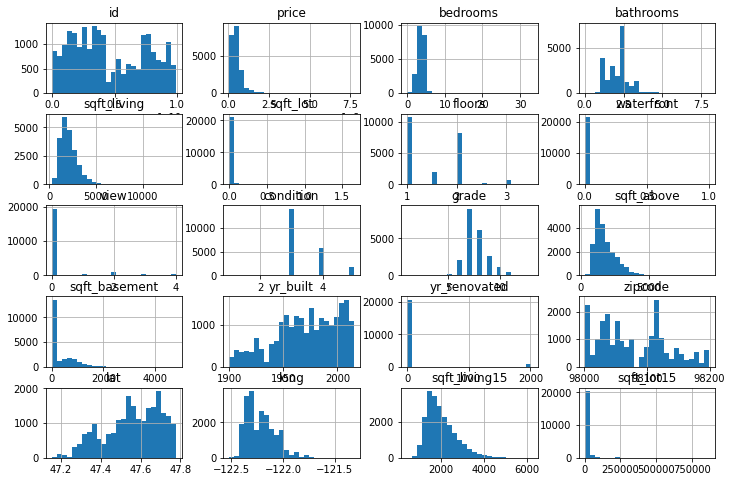

In [45]:
df.hist(bins=25, figsize=(40,20))
plt.show()

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


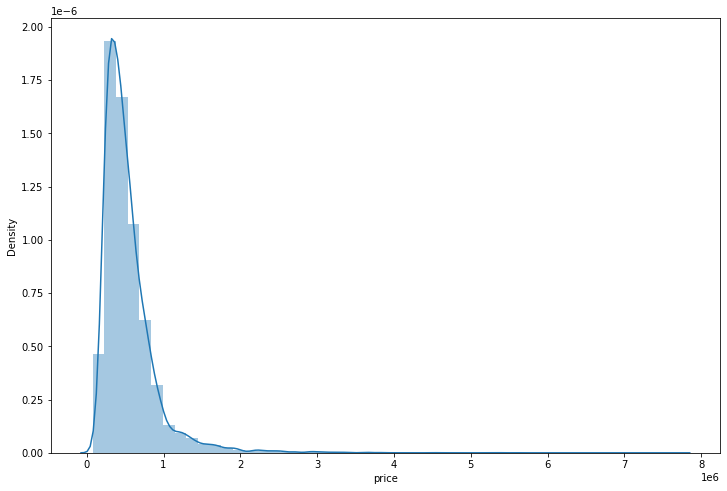

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])
plt.show()

In [44]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

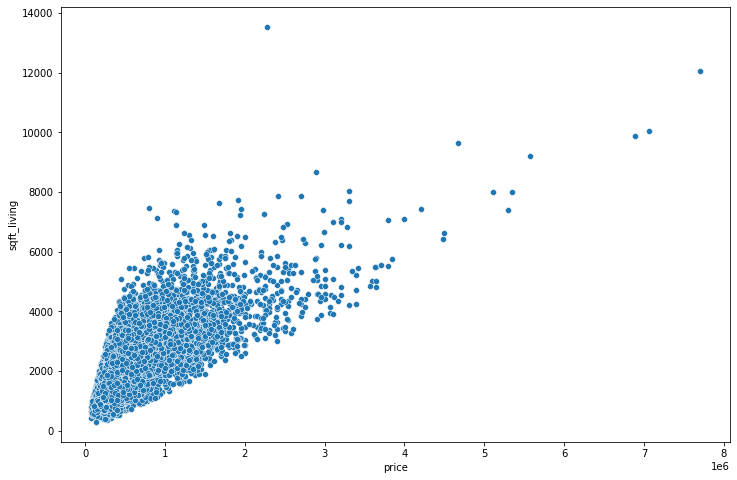

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)
plt.show()

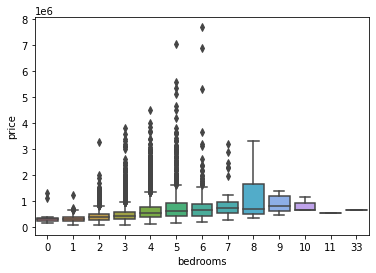

In [48]:
sns.boxplot(x='bedrooms',y='price',data=df)
plt.show()

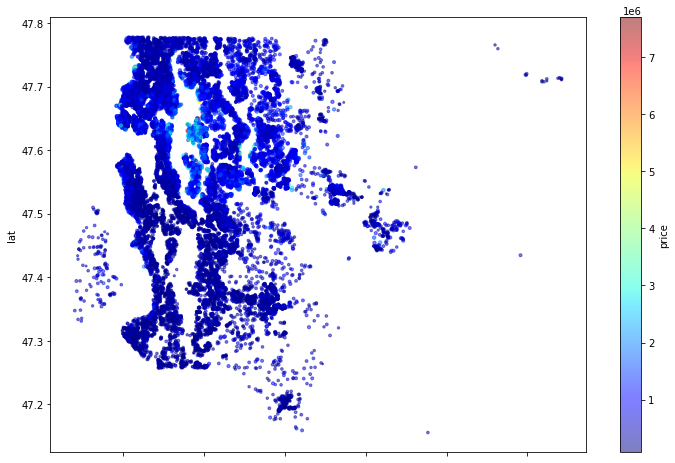

In [66]:
df.plot(kind='scatter',x='long',y='lat', alpha=0.5,
figsize=(12,8), c='price',s=df['grade'],cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

In [71]:
corr_matrix = df.corr()

In [74]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [75]:
df = df.drop('id',axis=1)

In [79]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date', axis=1)

In [78]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:title={'center':'Correlation Matrix'}>

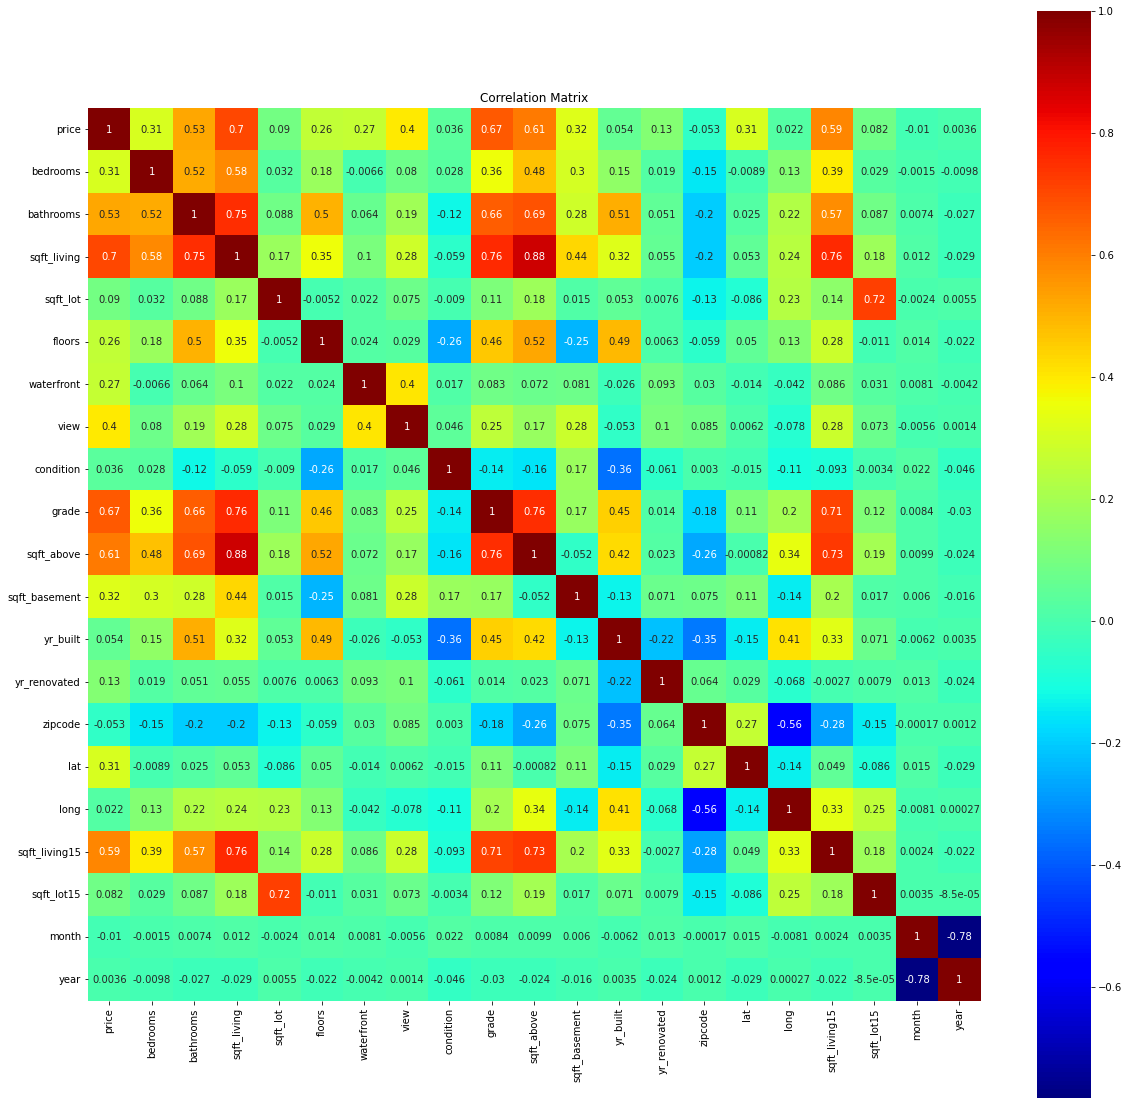

In [85]:
correlation = df.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='jet')

In [86]:
df = df.drop('zipcode',axis=1)

Train Test Split

In [108]:
X = df.drop('price',axis=1)
y = df['price'].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Scaling

In [110]:
scaler = MinMaxScaler()

In [111]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])

0.2000185073798177

Create the model

In [113]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [116]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [118]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
batch_size=128, epochs=400)

Epoch 1/400
136/136 [==============================] - 1s 8ms/step - loss: 131086737408.0000 - val_loss: 122115219456.0000
Epoch 2/400
136/136 [==============================] - 1s 7ms/step - loss: 99689037824.0000 - val_loss: 114082045952.0000
Epoch 3/400
136/136 [==============================] - 1s 7ms/step - loss: 97363353600.0000 - val_loss: 112496926720.0000
Epoch 4/400
136/136 [==============================] - 1s 7ms/step - loss: 96071450624.0000 - val_loss: 110894350336.0000
Epoch 5/400
136/136 [==============================] - 1s 7ms/step - loss: 94782529536.0000 - val_loss: 109343662080.0000
Epoch 6/400
136/136 [==============================] - 1s 7ms/step - loss: 93468278784.0000 - val_loss: 107776319488.0000
Epoch 7/400
136/136 [==============================] - 1s 7ms/step - loss: 92086788096.0000 - val_loss: 106157588480.0000
Epoch 8/400
136/136 [==============================] - 1s 7ms/step - loss: 90690600960.0000 - val_loss: 104441544704.0000
Epoch 9/400
136/136 [==

In [119]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

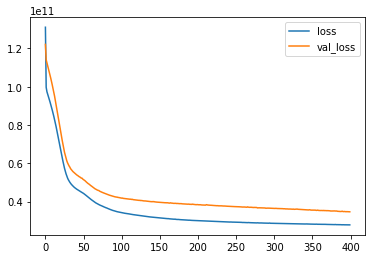

In [120]:
losses.plot()

In [122]:
predictions = model.predict(X_test)

136/136 [==============================] - 0s 2ms/step


In [123]:
mean_absolute_error(y_test, predictions)

108388.08634954024

In [124]:
np.sqrt(mean_squared_error(y_test,predictions))

186115.01972525436

In [125]:
explained_variance_score(y_test,predictions) 
#77% of Y test can be explained by X, the other is external factors

0.7708722714144978

In [129]:
house_mean = df['price'].mean()
house_med = df['price'].median()

In [133]:
print(f'house_mean: {house_mean}') 
print(f'house_med: {house_med}')

house_mean: 540088.1417665294
house_med: 450000.0


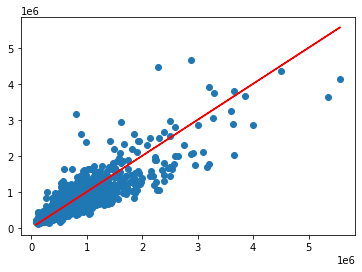

In [139]:
plt.scatter(y_test, predictions) # model prediction
plt.plot(y_test, y_test, 'r') # perfect prediction
plt.show()

In [145]:
errors = y_test.reshape(y_test.shape[0],1) - predictions

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

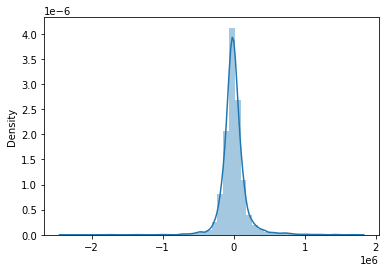

In [146]:
sns.distplot(errors)

Predict!

In [148]:
single_house = df.drop('price',axis=1).iloc[256]

In [149]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [150]:
single_house

array([[0.12121212, 0.21875   , 0.17602041, 0.00609822, 0.        ,
        0.        , 0.        , 0.75      , 0.5       , 0.10385064,
        0.24481328, 0.47826087, 0.        , 0.595989  , 0.14451827,
        0.26002409, 0.00800529, 0.81818182, 0.        ]])

In [170]:
model.predict(single_house)

1/1 [==============================] - 0s 18ms/step


array([[428227.06]], dtype=float32)

In [181]:
actual = df.iloc[256]['price']
mod = model.predict(single_house)
pred = mod.reshape(mod.shape[0],)

1/1 [==============================] - 0s 14ms/step


In [186]:
print(f'actual: [{actual}]')
print(f'predicted: {pred}')

actual: [385000.0]
predicted: [428227.06]
